In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:

x = np.array([30.37292789969,31.99187600139,33.6108241031,
              35.22977220481,36.84872030651,38.46766840822,
              40.65324834552,42.27219644723,43.89114454894,
              45.51009265064,47.12904075235,48.74798885406,50.36693695576,
              51.98588505747,53.60483315918,55.22378126088,
              56.84272936259,58.4616774643,60.080625566,
              61.69957366771,63.31852176942,64.93746987113,
              66.55641797283,68.17536607454,69.79431417625,
              71.41326227795,73.03221037966,74.65115848137,
              76.27010658307,77.88905468478,79.50800278649,
              81.12695088819,82.7458989899,84.36484709161,
              85.98379519331,87.60274329502,89.22169139673,
              90.84063949843,92.45958760014,94.07853570185,
              95.69748380355,97.31643190526,98.93538000697,
              100.5543281087,102.1732762104,103.7922243121])


y = np.array([-0.5429885000496,-0.6086670962625,-0.1817562208784,
              0.01527956776048,0.01527956776048,-0.08323832655894,
              -0.08323832655894,0.1137974620799,0.4093511450382,
              1.033297809061,1.263172895806,1.460208684445,
              1.624405174978,1.952798156042,2.576744820065,
              3.200691484088,3.726120253792,4.842656389412,
              6.057710419352,7.502639536036,8.750532864082,
              9.867068999703,11.27915881828,13.15099881035,
              16.00801774561,18.17541142064,19.94873351839,
              21.49218052939,22.70723455933,24.11932437791,
              25.89264647566,28.15855804501,30.6543447011,
              33.47852433826,36.99232923565,39.84934817091,
              42.11525974026,43.92142113612,45.46486814712,
              46.81127936949,47.92781550511,48.88015515019,
              49.79965549717,50.52212005552,51.34310250818,
              51.9670491722])

Let's define somes constants of our problem

In [3]:
R = 20    # capsule radius (nm)
N = 19000    # number of baise-pairs

pi = np.pi

In this model we will asume that the internal force will be proportional to $ \left (
\frac{v}{V} \right )^b  $
where v is the volume spaned by the polymer inside the capsule and V the volume of the capsule

In [105]:
def model(x,l,a,b) :
    
    V = 1.3*pi*(R**3) # volume of the capsule
    r = x*N*l   # radius of polymer inside the capsule
    v = 1.3*pi*(r**3) # volume spaned by the polymer
    
    idx = np.where(v<V)[0]
    
    f = a* (v/V)**b
    f[idx] = 0
    
    
    return f

Let's fit it

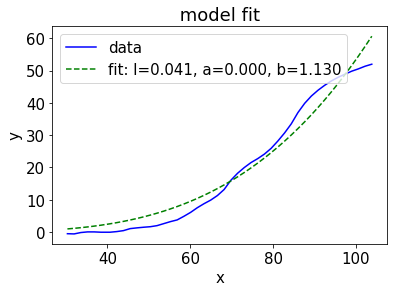

In [106]:
plt.figure(1)
plt.rc('font', size=15)

popt, pcov = curve_fit(model, x,y,maxfev=10000)

plt.plot(x, y, 'b-', label='data')
plt.plot(x, model(x, *popt), 'g--',
         label='fit: l=%5.3f, a=%5.3f, b=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.title(' model fit ')
plt.legend()
plt.show()

In [82]:
popt

array([4.09664447e-02, 3.59205807e-11, 1.13018065e+00])

so l is our control parameter it represent the length of 1 base-pair. We found it to be about 0.04 nM but in fact it is around 0.3 nM wich is not so bad for such a simple model.

We can expect this model to work best for low density polymer inside the capsule. In fact we can see that it poorly reproduce behaviour for high density. So let's at first focus on the low density behavior.

In [124]:
treshold = 70

idx = np.where((x<treshold))[0]

x_before = np.linspace(10,30,15)
y_before = np.ones(15)*y[0]

In [125]:
X = np.concatenate((x_before,x[idx]))
Y = np.concatenate((y_before,y[idx]))

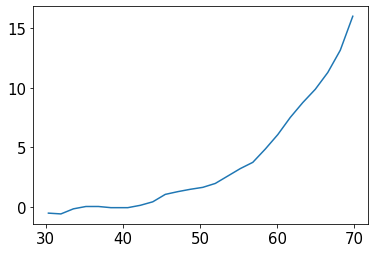

In [126]:
plt.plot(x[idx],y[idx])

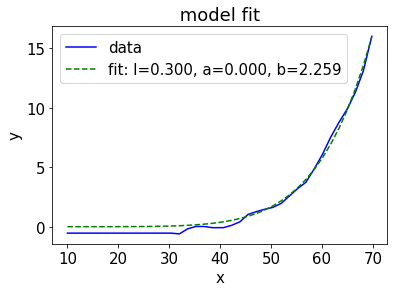

In [127]:
plt.figure()
plt.rc('font', size=15)

popt, pcov = curve_fit(model, X,Y,maxfev=10000)

plt.plot(X,Y, 'b-', label='data')
plt.plot(X, model(X, *popt), 'g--',
         label='fit: l=%5.3f, a=%5.3f, b=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.title(' model fit ')
plt.legend()
plt.show()

In [128]:
def model2(x,x_crit,c,b) :
    
    V = 1.3*pi*(R**3) # volume of the capsule
    
    f = c* (x/x_crit)**b
    idx = np.where(x<x_crit)
    f[idx] = 0
    
    return f

<ipython-input-128-a226133d9831>:5: RuntimeWarning: invalid value encountered in power
  f = c* (x/x_crit)**b


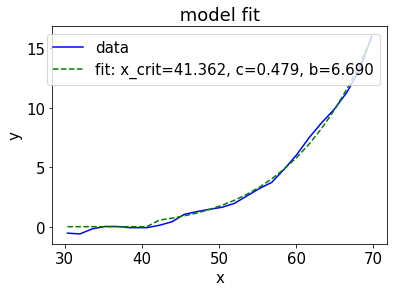

In [133]:
X = x[idx]
Y = y[idx]

plt.figure()
plt.rc('font', size=15)

popt, pcov = curve_fit(model2, X,Y,maxfev=10000,p0=[40,1,1])

plt.plot(X,Y, 'b-', label='data')
plt.plot(X, model2(X, *popt), 'g--',
         label='fit: x_crit=%5.3f, c=%5.3f, b=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.title(' model fit ')
plt.legend()
plt.show()